### Quadrinôme :
- ABDESSAMED BOULARIACHE
- KEMOUM Meroua
- MAHIDDINE Mohamed Amine
- TAZIR REDA

# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];


In [4]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

### 0- Fonction mpgistique (Sigmoid)
<img src="sigmoid.PNG" width="150"/>

In [5]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))

### 1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement
- sans vectorisation
<img src="cost.PNG" width="600"/>
- avec vectorisation
<img src="cost_vect.PNG" width="500"/>

In [6]:
def computeCost(X, y, theta):
    jt=0

    for i in range(len(X)):
        j = 0
        for k in range(X.shape[1]):
            j=j+theta[k][0]*X[i,k] 
        j=y[i] *np.log(Sigmoid(j))+(1-y[i]) *np.log(1-Sigmoid(j)+0.0000001) 
        jt=jt+j
    jt=(-jt)/((len(X)))
    return jt

### 2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

<img src="gradient.PNG" width="400"/>
- avec vectorisation :
<img src="gradient_vect.PNG" width="300"/>

### avec vectorisation

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0] #len(X)                                                             

    all_cost = []
    all_theta = [theta]
    for i in range(iterations):  
        all_cost.append(computeCost(X, y, theta)) # garder aussi le cout à chaque itération 
        
        H = Sigmoid(np.matmul(X, theta))
        H = H.reshape((H.shape[0],))
        diff = np.subtract(H, y)
        a = np.matmul(np.transpose(X), diff).reshape((theta.shape[0],1))

        theta = theta - (alpha/m) * a
        all_theta.append(theta)
        
    return all_theta, all_cost


### sans vectorisation

In [8]:

all_t0=[]
all_t1=[]
all_t2=[]
all_costs=[]

def j(theta, X,y):
    theta_new=[]
    for l in range (X.shape[1]):
        j = 0
        for i in range(len(X)):
            t = 0
            for k in range (X.shape[1]):
                t=t+theta[k][0]*X[i, k]
            t-Sigmoid(t)
            t=t-y[i]
            j=j+t*X[1,l]
        j=j/len(X)
        theta_new.append(j)
    return theta_new


def gradientDescentsans(x, y, theta, alpha, iterations): 


    # GDMV
    i = 0
    while(i<iterations):

        jd=[]
        jd=j(theta, X,y)

        for k in range(len(jd)):
            theta[k][0] = theta[k][0]-alpha*jd[k]
        if k==0:
            all_t0.append(theta[k][0]) 
        if k==1:
            all_t1.append(theta[k][0])
        if k==2:
            all_t2.append(theta[k][0])
        all_costs.append(computeCost(X, y, theta))

        i=i+1



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [9]:
n=X.shape[1]
theta = np.zeros((n, 1))

print(theta)

[[0.]
 [0.]
 [0.]]


In [10]:
X.shape, theta.shape, y.shape

((100, 3), (3, 1), (100,))

Calculer le cout initial

In [11]:
initialCost=computeCost(X, y, theta)

print(initialCost)

0.6931471005599541


Appel des la fonction de calcul du gradient

In [14]:
import time
# paramètres
iterations = 15000;
alpha = 0.01;

# Appel

start = 0
start =  time.time()

theta, cost = gradientDescent (X, y, theta, alpha, iterations)
#gradientDescentsans (X, y, theta, alpha, iterations)
end = time.time()

print("temps d'execution : ",end -start)


# Meilleure theta
best_theta = theta[-1]
print(best_theta)

temps d'execution :  102.11640763282776
[[-6.26835023]
 [ 0.28185706]
 [ 0.2482775 ]]


Traçage de la fonction du coût

Text(0, 0.5, 'Cost')

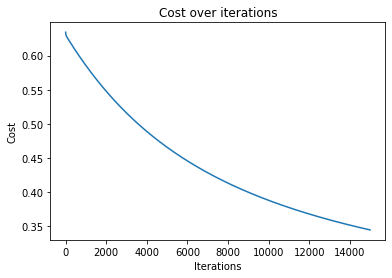

In [15]:
plt.plot(cost)

#labels
plt.title('Cost over iterations')
plt.xlabel("Iterations")
plt.ylabel("Cost")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données
<img src="boundry.PNG" width="400"/>

In [16]:
def drawLine(theta, X):

    plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
    
    # Calculate the decision boundary line
    plot_y = -(theta[1] * plot_x + theta[0]) / theta[2] 

   
    # Plot
    plt.plot(plot_x, (plot_y))
    
    #plt.axis([0, 20, 0, 20])


# Affichage 
Graphe representant les acceptations selon les caracteristiques

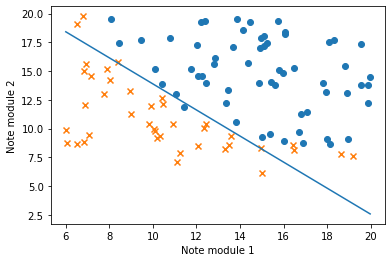

In [17]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
drawLine(best_theta, X)





Prédire des valeurs de y

In [23]:
# Predire pour des notes note1= 9 et note2=17
predict = np.matmul([1, 9, 17],best_theta)

print("prediction : ",Sigmoid(predict))

prediction :  [0.61988986]


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [19]:
from sklearn.linear_model import LogisticRegression

X2 = X[:,1:]
y2 = y
start =  time.time()

# use LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X2, y2)

end = time.time()

print("temps d'execution : ",end -start)


# Coefficient of the features in the decision function. (from theta 1 to theta n)
parameters = log_reg.coef_[0]

# Intercept (a.k.a. bias)  (theta 0)
parameter0 = log_reg.intercept_

temps d'execution :  0.07529854774475098


In [20]:
print("theta 1 and theta 2 :")
print(parameters)
print("Intercept :")
print(parameter0)

theta 1 and theta 2 :
[0.94159608 0.91667148]
Intercept :
[-22.93181743]


### Graphe representant les acceptations selon les caracteristiques

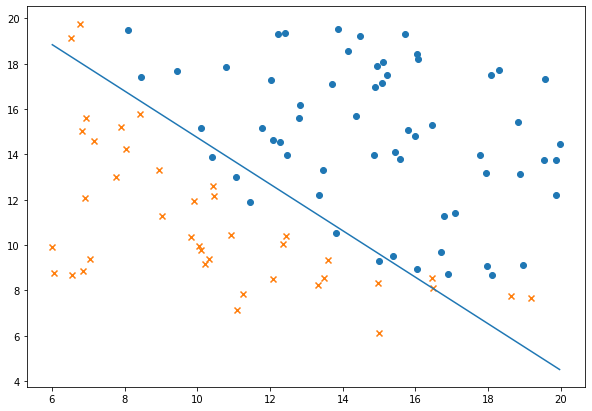

In [21]:
# Plotting the decision boundary
fig = plt.figure(figsize=(10,7))

plt.scatter(X2[np.where(y2==1),0], X2[np.where(y2==1),1], label="accepte",marker ='o')
plt.scatter(X2[np.where(y2==0),0], X2[np.where(y2==0),1], label="non accepte",marker ='x')


x_values = [np.min(X2[:,]), np.max(X2[:,] )]
# calcul y values
y_values = np.dot((-1./parameters[1]), (np.dot(parameters[0],x_values) + parameter0))

plt.plot(x_values, y_values, label='Decision Boundary')



# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

Il existe différentes approches pour optimiser la fonction de coût :
- Conjugate  gradient 
- BFGS 
- L-BFGS 

Ce sont des exemples d'algorithmes d'optimisation plus sophistiqués que la descente de gradient qui permettent d'évoluer beaucoup mieux les plus gros problèmes d'apprentissage.

### - comparisson skratcch vs sklearn

On a trouver precedament dans Dans la version skratch de gradient On a trouver que le temps d'execution :  15.010201215744019 seconds

 **pour la version de sklearn**

temps d'execution :  0.0049779415130615234

pour gradientdesentsans()  temps d'execution :  34.421135663986206

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance